In [84]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.linear_model import SGDRegressor

In [85]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

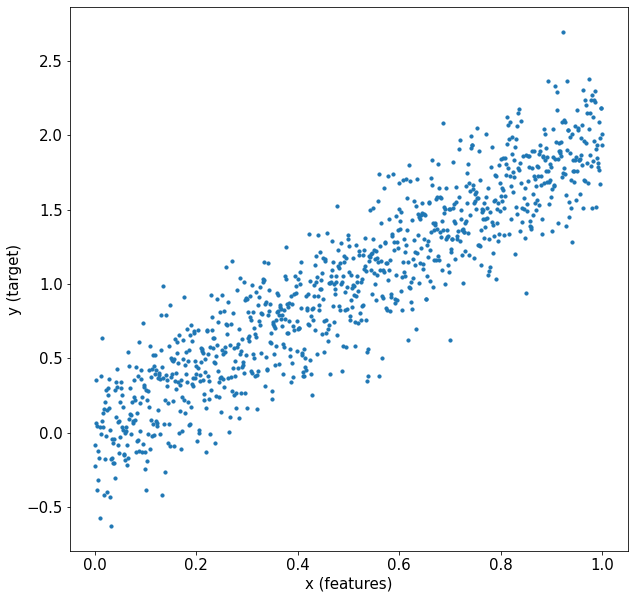

In [86]:
X = np.linspace(0, 1, 1000)
y_true = 2*X + np.random.randn(1000) * 0.25

plt.figure(figsize = (10, 10))
plt.scatter(X, y_true, s=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("x (features)", fontsize=15)
plt.ylabel("y (target)", fontsize=15)
plt.show()

In [87]:
train_size = int(len(X) * 0.8)

X_reshaped = X.reshape(-1, 1)

X_train = X_reshaped[:train_size]
y_train = y_true[:train_size]

X_test = X_reshaped[train_size:]
y_test = y_true[train_size:]

n_iters = [5, 10, 20, 50, 100, 1000]

In [88]:
scores1 = []
model1 = None

for n_iter in n_iters: 
    model1 = SGDRegressor(loss="squared_error", max_iter=n_iter, shuffle=True, learning_rate="constant", tol=None, eta0=0.05, penalty="elasticnet")
    model1.fit(X_train, y_train)
    scores1.append(model1.score(X_test, y_test))

In [89]:
scores2 = []
model2 = None

for n_iter in n_iters: 
    model2 = SGDRegressor(loss="epsilon_insensitive", max_iter=n_iter, shuffle=True, learning_rate="adaptive", tol=None, eta0=0.01, penalty="elasticnet")
    model2.fit(X_train, y_train)
    scores2.append(model2.score(X_test, y_test))

In [90]:
scores3 = []
model3 = None

for n_iter in n_iters: 
    model3 = SGDRegressor(loss="squared_error", max_iter=n_iter, shuffle=True, learning_rate="constant", tol=None, eta0=0.005, penalty="l1")
    model3.fit(X_train, y_train)
    scores3.append(model3.score(X_test, y_test))

In [91]:
scores4 = []
model4 = None

for n_iter in n_iters:
    model4 = SGDRegressor(loss="huber", max_iter=n_iter, shuffle=True, learning_rate="invscaling", tol=None, eta0=0.05, penalty="elasticnet")
    model4.fit(X_train, y_train)
    scores4.append(model4.score(X_test, y_test))

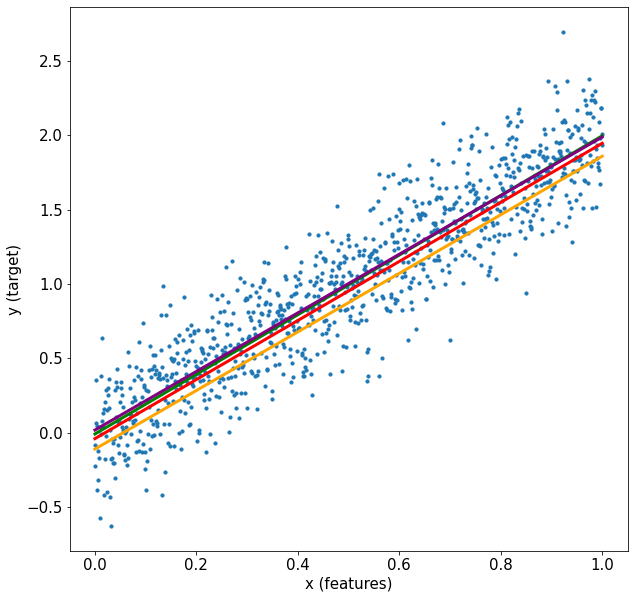

In [92]:
m1 = model1.coef_
b1 = model1.intercept_

m2 = model2.coef_
b2 = model2.intercept_

m3 = model3.coef_
b3 = model3.intercept_

m4 = model4.coef_
b4 = model4.intercept_

y1 = m1*X + b1
y2 = m2*X + b2
y3 = m3*X + b3
y4 = m4*X + b4

plt.figure(figsize = (10, 10))
plt.scatter(X, y_true, s=10)
plt.plot(X, y1, color = "orange", linewidth=3)
plt.plot(X, y2, color = "red", linewidth=3)
plt.plot(X, y3, color = "green", linewidth=3)
plt.plot(X, y4, color = "purple", linewidth=3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("x (features)", fontsize=15)
plt.ylabel("y (target)", fontsize=15)
plt.show()

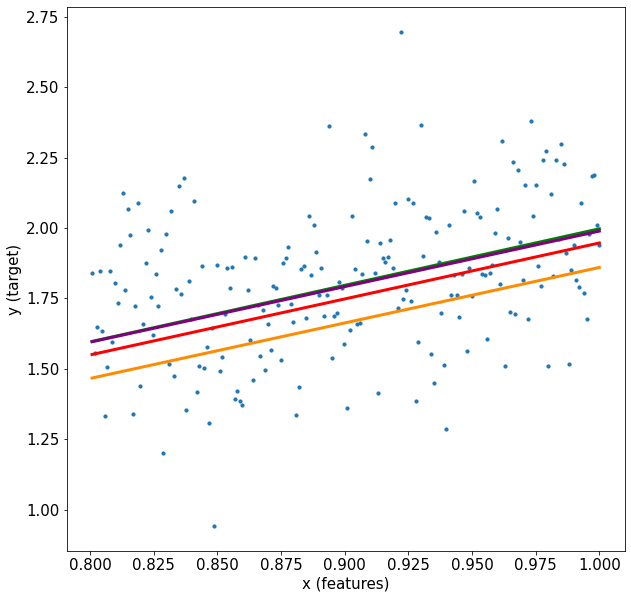

In [93]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)

plt.figure(figsize = (10, 10))
plt.scatter(X_test, y_test, s=10)
plt.plot(X_test, y_pred1, linewidth=3, color="darkorange")
plt.plot(X_test, y_pred2, linewidth=3, color="red")
plt.plot(X_test, y_pred3, linewidth=3, color="green")
plt.plot(X_test, y_pred4, linewidth=3, color="purple")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("x (features)", fontsize=15)
plt.ylabel("y (target)", fontsize=15)

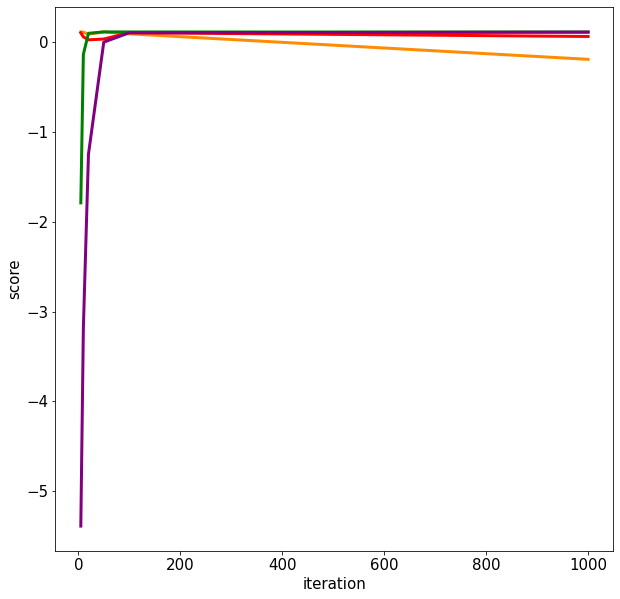

In [94]:
plt.figure(figsize = (10, 10))
plt.plot(n_iters, scores1, linewidth=3, color="darkorange")
plt.plot(n_iters, scores2, linewidth=3, color="red")
plt.plot(n_iters, scores3, linewidth=3, color="green")
plt.plot(n_iters, scores4, linewidth=3, color="purple")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("iteration", fontsize=15)
plt.ylabel("score", fontsize=15)
plt.show()